**Introduction**
-----------------
Ce notebook permets de découvrir le jeu de données d'articles `flipkart.csv` fourni par Linda.<br>


Je vais préparer les données sous forme de dataframe et effectuer **les traitements suivants** :
- **Prévisualisation**
- **Préparation des données**
- **Déterminer les variables pertinentes pour le traitement des parties texte et image**


Le dataframe prétraité sera sauvegardé et utilisé pour les prochaines étapes (feature extraction, étude de faisabilité).

# Imports

In [5]:
# Import main libraries
import pandas as pd
import os
import gc

# Import libraries for data visualization
import matplotlib.pyplot as plt
import missingno as msno

# Lecture du jeu de données flipkart

In [6]:
# Load the data
flipkart = pd.read_csv(
    "flipkart.csv",
    encoding="latin1", # This is important to avoid errors
    parse_dates=["crawl_timestamp"],
)

In [7]:
# Affiche les informations sur le je de données
print(flipkart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  1050 non-null   object             
 1   crawl_timestamp          1050 non-null   datetime64[ns, UTC]
 2   product_url              1050 non-null   object             
 3   product_name             1050 non-null   object             
 4   product_category_tree    1050 non-null   object             
 5   pid                      1050 non-null   object             
 6   retail_price             1049 non-null   float64            
 7   discounted_price         1049 non-null   float64            
 8   image                    1050 non-null   object             
 9   is_FK_Advantage_product  1050 non-null   bool               
 10  description              1050 non-null   object             
 11  product_rating           1050 

On dispose d'un échantillon de 1050 produits vendus sur Flipkart.<br>
En dehors de la variable `brand`, les autres variables n'ont pas ou très peu de valeurs manquantes.

# Analyse pré-exploratoire avec visualisation des données

Pour faciliter l'analyse pré-exploratoire et comprendre les variables, regardons les premières et dernières lignes du dataframe.<br>
En supplément, je vais réalise une observation plus poussée grâce à l'extension DataWrangler.

In [8]:
# Nécessite d'utiliser l'extension Data Wrangler de VS Code pour afficher l'entière du jeu de données
flipkart

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56+00:00,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56+00:00,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52+00:00,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52+00:00,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43+00:00,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43+00:00,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

A l'issue de cette inspection, je procéde à quelques vérifications sur les hypothèses suivantes:
- La variable `uniq_id` est similaire à `image` en dehors de l'extension du fichier.
- Vérification que le répetoire `images` contient bien les images des produits avec les mêmes noms que la variable `image` du dataframe.
- Vérification que toutes les images sont bien au format `jpg`.

In [9]:
# Vérification de l'identicité entre les colonnes 'uniq_id' et 'image'
assert flipkart["uniq_id"].equals(
    flipkart["image"].replace({".jpg": ""}, regex=True)
    ), "La colonne 'uniq_id' n'est pas identique à la colonne 'image' sans l'extension '.jpg'"

# Vérifie que toutes les images dans le dataframe sont présentes dans le répertoire des images
assert set(os.listdir("./Images")) - set(flipkart["image"]) == set(),"Toutes les images ne sont pas présentes dans le répertoire des images"

# Vérifie que toutes les images sont sous format .jpg
assert all(flipkart["image"].str.rsplit(".", expand=True)[1] == "jpg"), "Certaines images ne sont pas au format .jpg"


**Récupapitulatif des variables du jeu de données `flipkart` :**


| Champs                    | Description                                                                                  | Utile |
|---------------------------|----------------------------------------------------------------------------------------------|-------|
| uniq_id                   | nom du fichier image sans le format                                             | N     |
| crawl_timestamp           | Timestamp du crawler qui a récupéré les images                                               | N     |
| product_url               | Lien URL pointant vers le produit (contient product_name & pid)                         | N     |
| product_name              | Nom du produit (ref. product_url)                                                        | O     |
| product_category_tree     | Fil d'ariane indiquant la catégorie et sous-catégorie du produit                        | O     |
| pid                       | Id du produit (ref. product_url)                                                                          | N     |
| retail_price              | Prix de vente                                                                                        | N     |
| discounted_price          | Prix de vente après remise                                                                                | N     |
| image                     | nom du fichier image avec le format                                      | O     |
| is_FK_Advantage_product   | Indique si le produit fait partie du programme FlipKart Advantage                                                                         | N     |
| description               | Description textuelle du produit                                                                | O     |
| product_rating            | Note attribué au produit         | N     |
| overall_rating            | Identique à product_rating                                                                            | N     |
| brand                     | Marque du produit extrait de la description       | N     |
| product_specifications    | Contient les spécifications extraites de la description                                       | N     |


On supprime les variables non pertinentes à l'analyse :

In [10]:
# Crée un masque booléen pour filtrer les colonnes à supprimer
indices = [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]
mask = [bool(i) for i in indices]

# Filtre les colonnes à supprimer
cols = flipkart.columns[mask]
flipkart.drop(columns=cols, inplace=True)

# Supprime les variables intermédiaires
del mask, indices, cols
gc.collect()


67

Sur les variables restantes, j'effectue une analyse sur les valeurs manquantes et duplicatas :

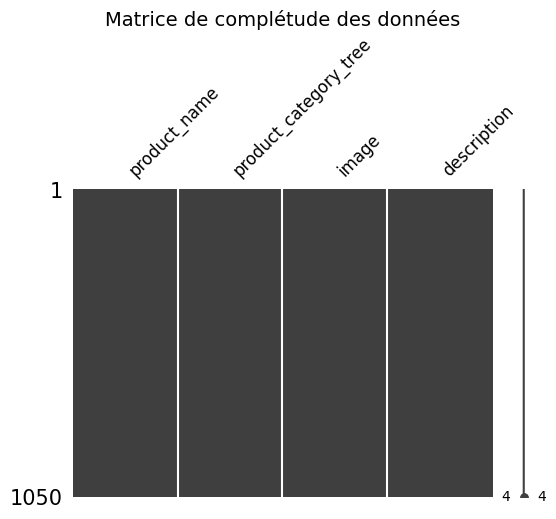

In [11]:
# Affiche le matrice de complétude des données
ax = msno.matrix(
    df=flipkart,
    sort="ascending",
    figsize=(6, 4),
    fontsize=12
)
ax.set_title("Matrice de complétude des données", fontsize=14)
plt.show()

In [12]:
# Vérifie s'il y a des duplicatas
print(f"Nombre de duplicatas généraux: {flipkart.duplicated().sum()}")
# Vérifie s'il y a des duplicatas spécifiques à la colonne 'description'
print(f"Nombre de duplicatas sur la colonne description: {flipkart['description'].duplicated().sum()}")
# Vérifie s'il y a des duplicatas spécifiques à la colonne 'product_name'
print(f"Nombre de duplicatas sur la colonne product_name: {flipkart['product_name'].duplicated().sum()}")

Nombre de duplicatas généraux: 0
Nombre de duplicatas sur la colonne description: 0
Nombre de duplicatas sur la colonne product_name: 0


Le dataframe ne contient plus de valeur manquante ni de duplicata.<br>

# Extraction des catégories de produits

**Nous allons extraire les catégories de produits pour pouvoir les utiliser dans la classification des produits.**<br>
Chaque catégorie est séparée par un '>>' et nous allons les séparer et les stocker dans une colonne 'category_1', 'category_2', 'category_3' etc...<br>
La colonne 'category_1' contient la catégorie principale, 'category_2' la sous-catégorie et 'category_3' la sous-sous-catégorie, etc...

In [13]:
# Extraction des catégories de produits depuis la donnée 'product_category_tree'
categories = (
    flipkart["product_category_tree"]
    .str.strip('["|"]')
    .str.split(r"\s+>>\s+", expand=True)
    .rename(columns={i: f"category_{i}" for i in range(0, 7)})
)
cat_list = list(categories.columns)

# Concatène les catégories extraites avec le dataframe flipkart et supprime la colonne 'product_category_tree'
flipkart = pd.concat([flipkart, categories], axis=1).drop(
    "product_category_tree", axis=1
)

# Imprime la nouvelle taille du dataframe
print(f"Dimensions du dataframe après transformations: {flipkart.shape}")

# Supprime les variables intermédiaires
del categories
gc.collect()

Dimensions du dataframe après transformations: (1050, 10)


34

# Analyse des colonnes de catégories extraites

Regardons à présent la complétude des colonnes de catégories extraites:

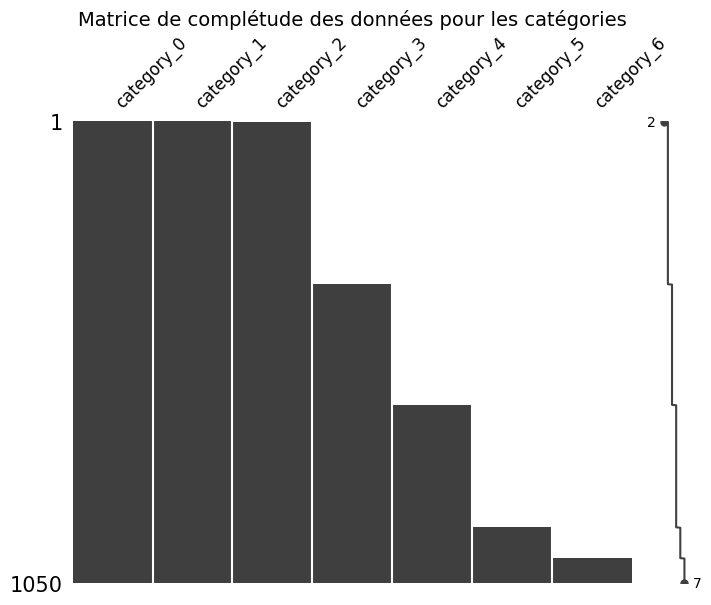

In [14]:
# Création de la matrice de complétude des données pour les catégories
ax = msno.matrix(
    df=flipkart.filter(cat_list),
    sort="ascending",
    figsize=(8, 6),
    fontsize=12
)
ax.set_title("Matrice de complétude des données pour les catégories", fontsize=14)
plt.show()

On peut constater que seules les colonnes 'category_1' et 'category_2' sont complètes.<br>
Regardons maintenant **le nombre de catégories uniques** par colonne:

In [15]:
print("Nombre de valeurs uniques par colonne de catégorie:")
print(flipkart.filter(cat_list).nunique())

Nombre de valeurs uniques par colonne de catégorie:
category_0      7
category_1     62
category_2    241
category_3    349
category_4    297
category_5    117
category_6     57
dtype: int64


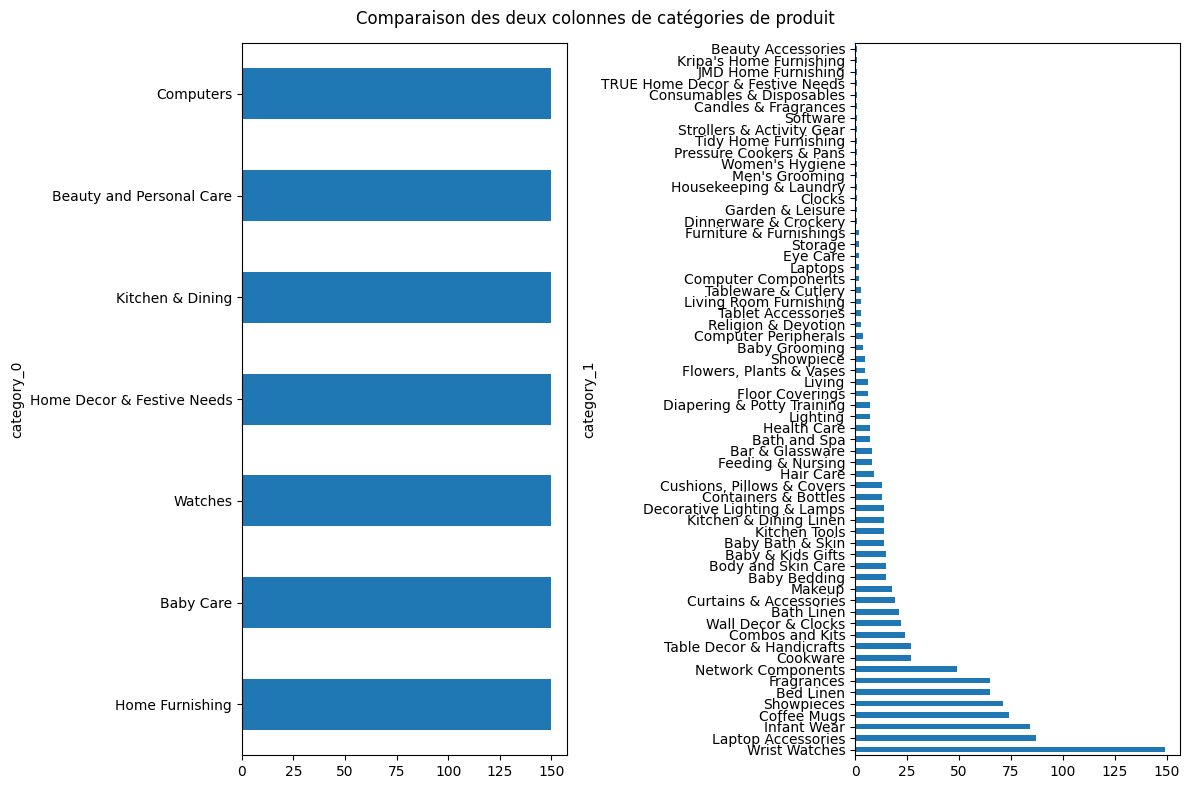

In [16]:
# Crée et nomme la figure
fig, ax = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
fig.suptitle("Comparaison des deux colonnes de catégories de produit")

# Itére sur chaque série pour créer un barplot du value counts
for i, axes in enumerate(ax.flatten()):
    flipkart[cat_list[i]].value_counts(ascending=False).plot(kind="barh", ax=axes)
plt.show()

La **catégorie 0** a l'avantage d'avoir **les catégories uniformément réparties** soit un nombre de 150 produits par catégories.<br>
Je conserve uniquement la colonne 'category_0' que je renomme en 'class':

In [17]:
# Réalise les opérations de suppression et de renommage
flipkart.drop(columns=cat_list[1:], inplace=True)
flipkart.rename(columns={"category_0": "class"}, inplace=True)
flipkart = flipkart.astype({"class": "category"})

# Supprime les variables intermédiaires
del(cat_list, ax, fig, axes, i)

# On affiche les informations sur le dataframe restant
print(flipkart.info())
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   product_name  1050 non-null   object  
 1   image         1050 non-null   object  
 2   description   1050 non-null   object  
 3   class         1050 non-null   category
dtypes: category(1), object(3)
memory usage: 26.1+ KB
None


23003

Je sauvagarde le dataframe prétraité pour les prochaines étapes au format pickle pour conserver les datatypes des colonnes.

In [18]:
# Sauvegarde le dataframe nettoyé au format pickle
flipkart.to_pickle("flipkart_cleaned.pkl")